In [1]:
import os
os.chdir('../')

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import contextily as cx
import pyreadstat

## all_shapefiles contains the combined shapefiles

In [3]:
allshape_files = gpd.read_file('external_dataset/all_shapefiles.gpkg')

In [4]:
gadm_1_geo.head()

,GID_1,geometry
0,SEN1,"MULTIPOLYGON (((-17.46764 14.64874, -17.46764 ..."
1,SEN2,"MULTIPOLYGON (((-16.04326 14.55500, -16.04513 ..."
2,SEN3,"MULTIPOLYGON (((-16.65347 13.64736, -16.65347 ..."
3,SEN4,"POLYGON ((-15.39492 13.75729, -15.39724 13.754..."
4,SEN5,"POLYGON ((-15.99889 13.59169, -15.99910 13.591..."


In [5]:
allshape_files[allshape_files.COUNTRY.str.startswith('Mad')]

GID_1 GID_0     COUNTRY        NAME_1 VARNAME_1 NL_NAME_1 TYPE_1   
219  MDG.1_1   MDG  Madagascar  Antananarivo        NA        NA     NA  \
220  MDG.2_1   MDG  Madagascar   Antsiranana        NA        NA     NA   
221  MDG.3_1   MDG  Madagascar  Fianarantsoa        NA        NA     NA   
222  MDG.4_1   MDG  Madagascar     Mahajanga        NA        NA     NA   
223  MDG.5_1   MDG  Madagascar     Toamasina        NA        NA     NA   
224  MDG.6_1   MDG  Madagascar       Toliary        NA        NA     NA   

    ENGTYPE_1 CC_1 HASC_1 ISO_1   
219        NA   NA     NA  MG-T  \
220        NA   NA     NA  MG-D   
221        NA   NA     NA  MG-F   
222        NA   NA     NA  MG-M   
223        NA   NA     NA  MG-A   
224        NA   NA     NA    NA   

                                              geometry  
219  POLYGON ((46.93914 -20.17013, 46.93860 -20.170...  
220  MULTIPOLYGON (((50.15347 -16.00320, 50.15347 -...  
221  MULTIPOLYGON (((47.04934 -24.08504, 47.04925 -...  
222  MULTIPOLYGON (((44.23931 -18.96421, 44.23931 -...  
223  MULTIPOLYGON (((47.67118 -20.36464, 47.67130 -...  
224  MULTIPOLYGON (((44.33236 -25.26931, 44.33236 -...

## SCI data

In [4]:
sci = pd.read_csv("../external_dataset/Meta_sci_data/gadm1_nuts3_counties-gadm1_nuts3_counties - FB Social Connectedness Index - October 2021.tsv", sep='\t')

In [5]:
sci.head()

,user_loc,fr_loc,scaled_sci
0,ABW,ABW,11264841
1,ABW,AGO1,38
2,ABW,AGO10,34
3,ABW,AGO11,32
4,ABW,AGO12,23


In [9]:
health_ind = pd.read_csv('external_dataset/dhs_health.csv')

In [27]:
health_ind.head()

,GID_1,rel_major,rel_minor,lang_major,lang_minor,middle,poorer,poorest,richer,richest,...,evangelical presbyterian,pentecotist,baha'i,jehovah's witness,jewish,mammon,pentecostal/born again/evangelical,presbyterian,salvation army,apostolic sect
0,AGO1,0.240489,0.759511,1.000000,0.000000,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO10,0.551410,0.448590,0.887231,0.112769,0.153400,0.126866,0.470149,0.135158,0.114428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO11,0.332359,0.667641,0.995982,0.004018,0.147188,0.007305,0.000000,0.348064,0.497443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO12,0.133843,0.866157,0.789675,0.210325,0.302103,0.344168,0.207457,0.074570,0.071702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO13,0.126873,0.873127,0.952048,0.047952,0.353646,0.321678,0.080919,0.163836,0.079920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Generated geometry and variables dataset

In [6]:
gadm_1_v = pd.read_csv("combined_dataset/GADM_1_variables.csv")
gadm_1_geo = gpd.read_file("combined_dataset/GADM_1_geometries.gpkg")
gadm_1 = gadm_1_geo.merge(gpd.GeoDataFrame(gadm_1_v), on='GID_1', how='inner')

In [7]:
gadm_1_geo.head()

,GID_1,geometry
0,SEN1,"MULTIPOLYGON (((-17.46764 14.64874, -17.46764 ..."
1,SEN2,"MULTIPOLYGON (((-16.04326 14.55500, -16.04513 ..."
2,SEN3,"MULTIPOLYGON (((-16.65347 13.64736, -16.65347 ..."
3,SEN4,"POLYGON ((-15.39492 13.75729, -15.39724 13.754..."
4,SEN5,"POLYGON ((-15.99889 13.59169, -15.99910 13.591..."


In [8]:
gadm_1_v.head()

,Unnamed: 0,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,ISO_1,...,evangelical presbyterian,pentecotist,baha'i,jehovah's witness,jewish,mammon,pentecostal/born again/evangelical,presbyterian,salvation army,apostolic sect
0,0,SEN,Senegal,Dakar,Cap Vert|Dacar,NaN,Région,Region,1,SN-DK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SEN,Senegal,Diourbel,NaN,NaN,Région,Region,3,SN-DB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SEN,Senegal,Fatick,NaN,NaN,Région,Region,9,SN-FK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,SEN,Senegal,Kaffrine,NaN,NaN,Région,Region,12,SN-KA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,SEN,Senegal,Kaolack,NaN,NaN,Région,Region,6,SN-KL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


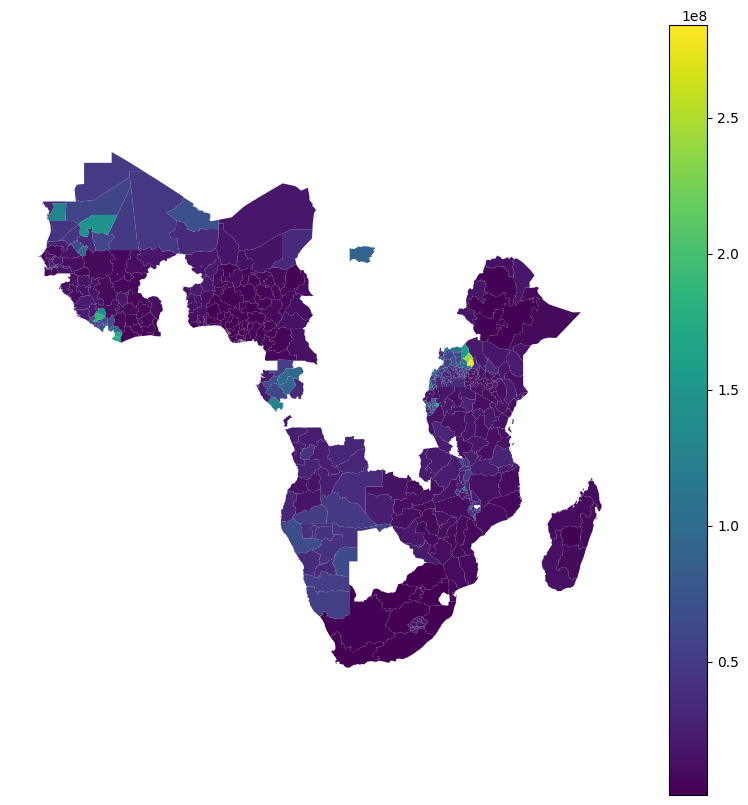

In [9]:
## All countries with data
gadm_1.plot(figsize=(10,10),column='SCI',legend=True)
plt.axis('off')
plt.show()

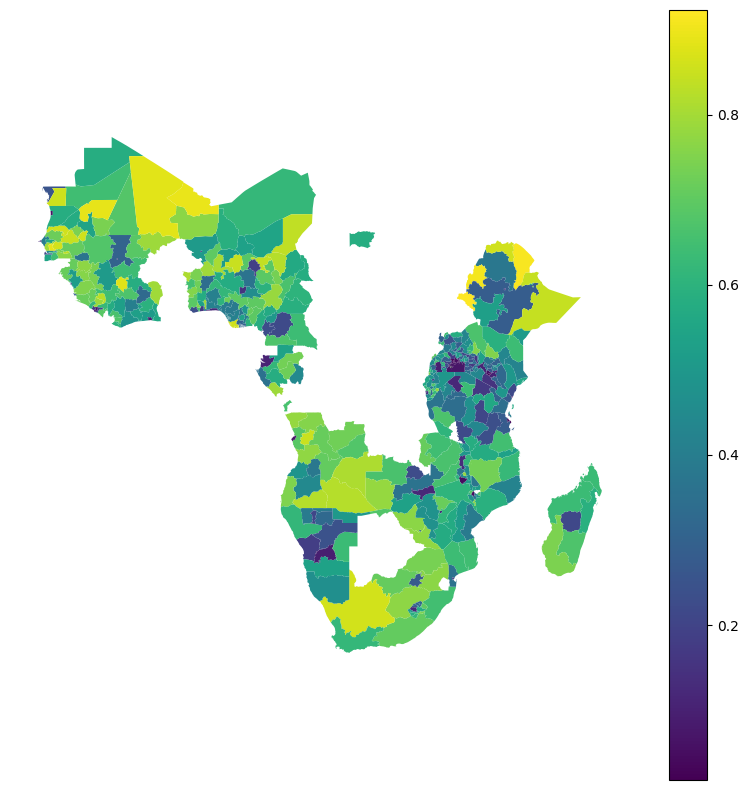

In [11]:
gadm_1.plot(figsize=(10,10),column='ratio_selfloop_to_country',legend=True)
plt.axis('off')
plt.show()

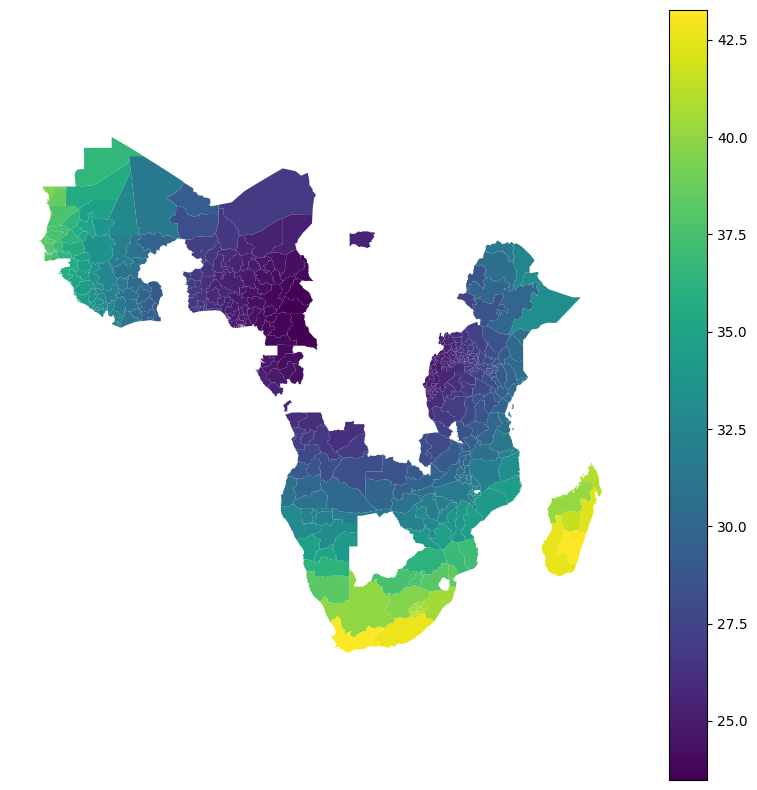

In [12]:
gadm_1.plot(figsize=(10,10),column='Mean_dist_to_SCI',legend=True)
plt.axis('off')
plt.show()

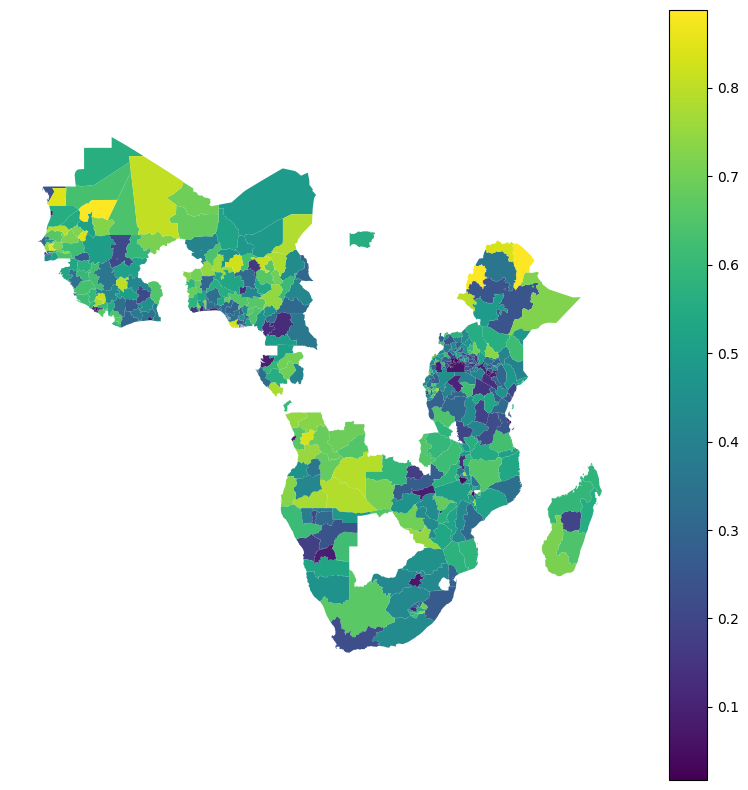

In [13]:
gadm_1.plot(figsize=(10,10),column='ratio_selfloop_to_africa',legend=True)
plt.axis('off')
plt.show()

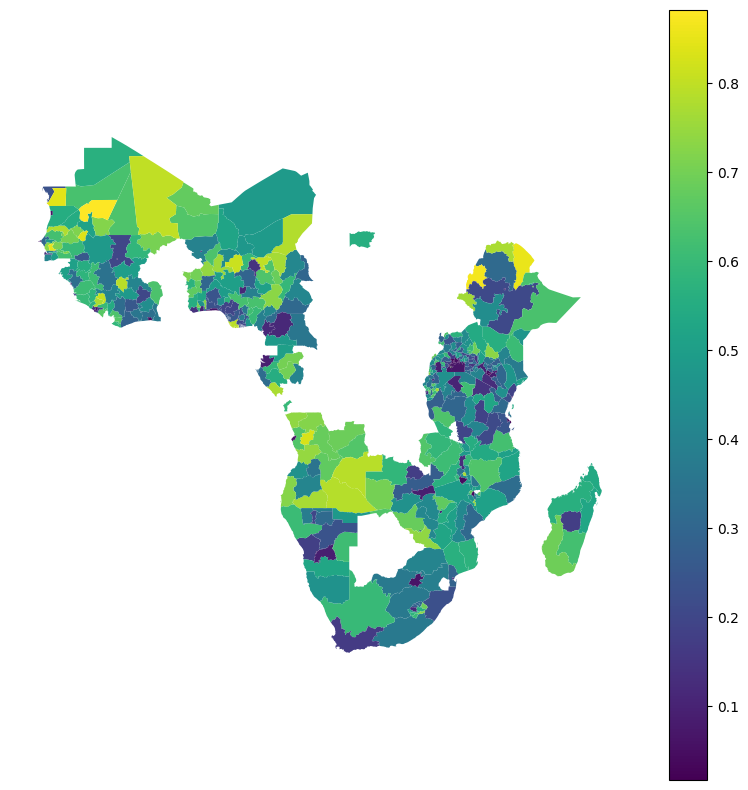

In [14]:
gadm_1.plot(figsize=(10,10),column='ratio_selfloop_to_all_sci',legend=True)
plt.axis('off')
plt.show()

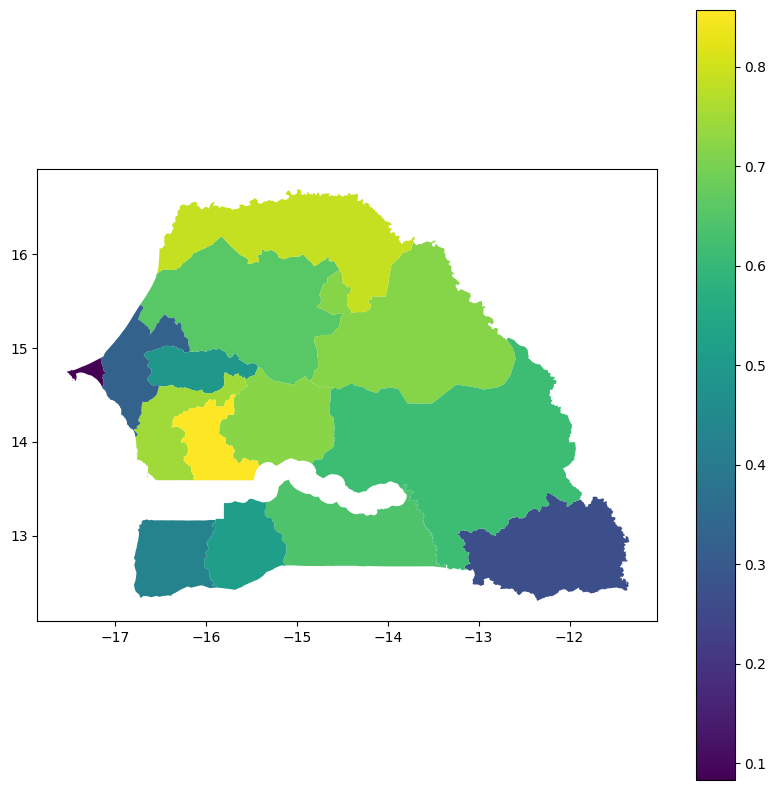

In [16]:
gadm_1[gadm_1['GID_0']=="SEN"][['ratio_selfloop_to_africa','geometry']].plot(figsize=(10,10),column='ratio_selfloop_to_africa',legend=True)
plt.show()

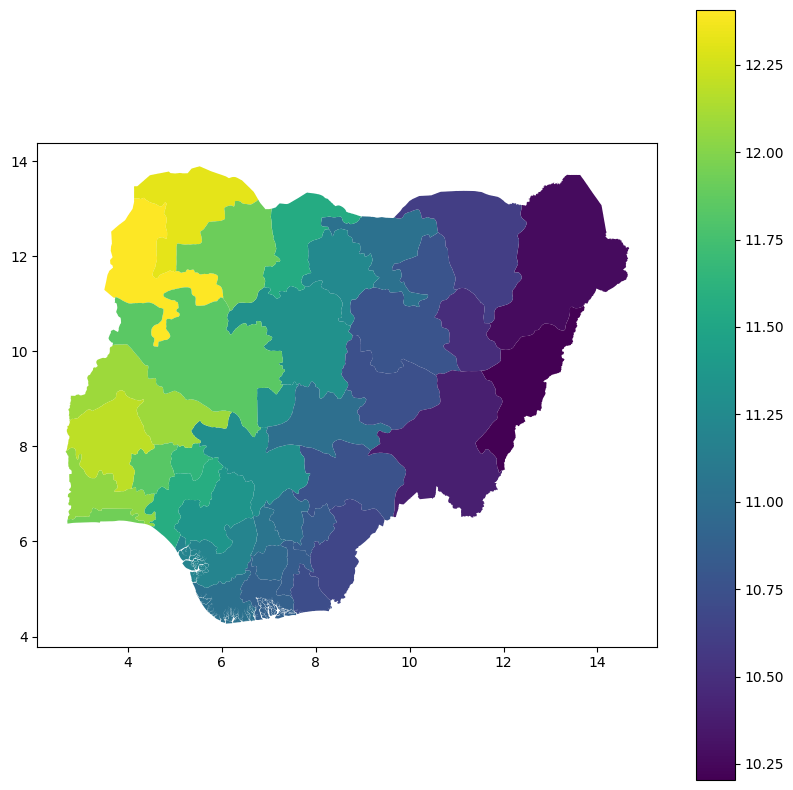

In [17]:
gadm_1[gadm_1['COUNTRY']=="Nigeria"].plot(figsize=(10,10),column='Std_dist_to_SCI',legend=True)
plt.show()

# Afrobarometer data

In [19]:
afro_barometer_1 = pd.read_stata("../external_dataset/afro_regional.dta",convert_categoricals=False)
afro_barometer_1.head()

,country,year,region,trpar,trtax,trgov,trlaw,trgen,trrel,trnei,tracq,mp_service
0,1.0,2011.0,100.0,2.133583,1.101359,1.500720,1.685713,0.524865,2.400156,2.119522,1.603183,0.971810
1,1.0,2011.0,101.0,2.546581,1.553177,1.878101,2.164005,0.611403,2.632019,1.969915,1.505002,1.000000
2,1.0,2011.0,102.0,1.543943,1.263010,1.631452,1.728224,0.029859,2.802408,0.929917,0.748173,0.919051
3,1.0,2011.0,103.0,2.012048,1.297439,1.459003,1.977447,0.581889,2.688714,2.124295,1.728058,0.901420
4,1.0,2011.0,104.0,1.763607,1.504161,1.536362,1.756674,0.223407,2.435927,1.507750,1.322588,1.000000
